In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#importamos data de 1M

ratings=pd.read_csv('C:\\Users\\DAYRA\\Desktop\\PROYECTOS BRYAN\\PELICULAS BASE DE DATOS\\ml-1m\\ml-1m\\ratings.dat',delimiter='::',engine='python',header=None, encoding='latin1')
movies=pd.read_csv('C:\\Users\\DAYRA\\Desktop\\PROYECTOS BRYAN\\PELICULAS BASE DE DATOS\\ml-1m\\ml-1m\\movies.dat',delimiter='::',engine='python',header=None, encoding='latin1')
users=pd.read_csv('C:\\Users\\DAYRA\\Desktop\\PROYECTOS BRYAN\\PELICULAS BASE DE DATOS\\ml-1m\\ml-1m\\users.dat',delimiter='::',engine='python',header=None, encoding='latin1')

#corroboramos las columnas

ratings.columns
movies.columns
users.columns


Index([0, 1, 2, 3, 4], dtype='int64')

In [2]:

#asignamos nombres a las columnas 

ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
movies.columns = ['MovieID', 'Title', 'Genres']
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

#mostramos las primeras 5 filas de cada dataframe

ratings.head()



,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:

print(ratings.head)
print(movies.head)
print(users.head)
print(ratings.shape)
print(movies.shape)
print(users.shape)

<bound method NDFrame.head of          UserID  MovieID  Rating  Timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]>
<bound method NDFrame.head of       MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     394

In [4]:
# Verificar la información de los DataFrames
print(ratings.info())
print(movies.info())
print(users.info())

# Comprobar la cantidad de valores nulos
print(ratings.isnull().sum())
print(movies.isnull().sum())
print(users.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null 

REALIZERMOS UN ANALISIS DE DATOS QUE SOBRE LA DISTRIBUCIOND E RATING DE LAS PELICULAS

In [6]:
ratings["Rating"].unique()
movies["Genres"].unique()


array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

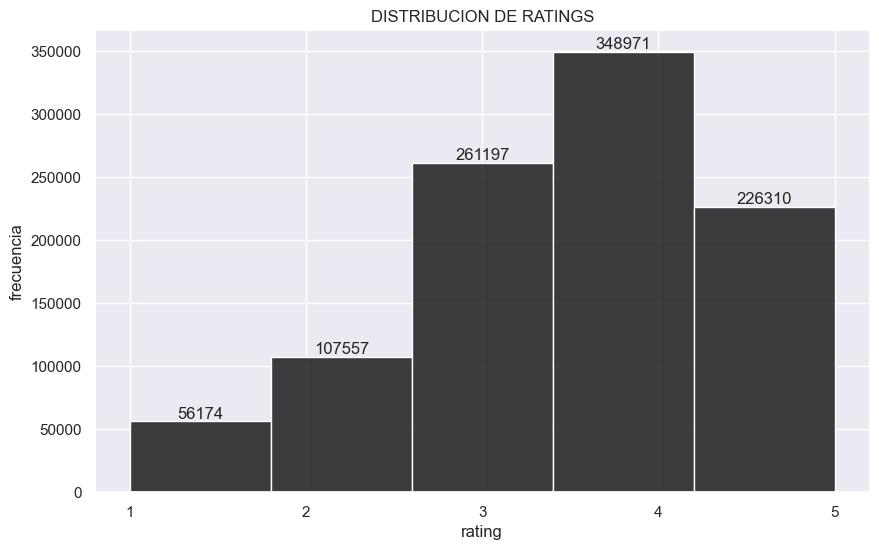

In [4]:
#configuramos los graficos
sns.set(style="darkgrid")

#histograma de ratings
plt.figure(figsize=(10,6))
ax=sns.histplot(ratings["Rating"],bins=5, kde=False, color= "black")
plt.title("DISTRIBUCION DE RATINGS")
plt.xlabel("rating")
plt.ylabel("frecuencia")
plt.xticks(ratings["Rating"].unique())
heights = ax.patches
for bar in heights:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom')
plt.show()

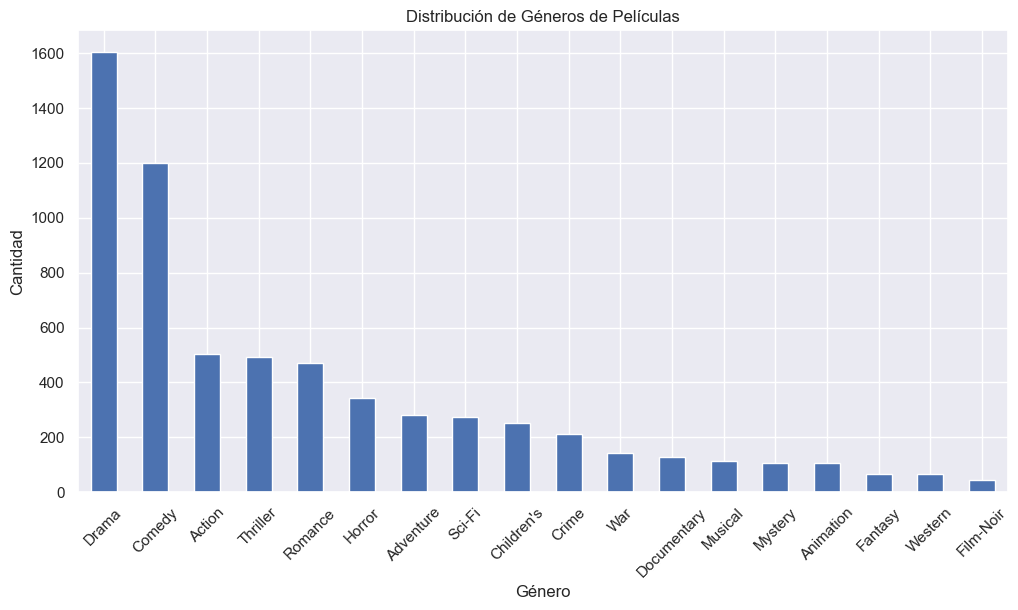

In [5]:
#contaremos la cantidad de generos de las peliculas
genre_counts=movies["Genres"].str.get_dummies(sep="|").sum().sort_values(ascending=False)

# Gráfico de distribución de géneros
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros de Películas')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()



In [5]:
users["Age"].unique()
users["Age"]

0        1
1       56
2       25
3       45
4       25
        ..
6035    25
6036    45
6037    56
6038    45
6039    25
Name: Age, Length: 6040, dtype: int64

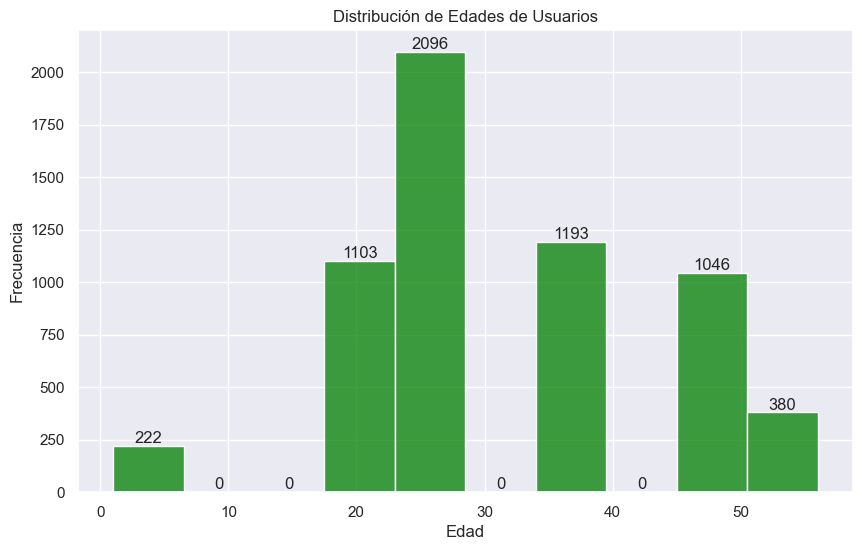

In [7]:
# Histograma de Edades de usuarios

plt.figure(figsize=(10, 6))
ax=sns.histplot(users['Age'], bins=10, kde=False, color='green')
plt.title('Distribución de Edades de Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
heights = ax.patches
for bar in heights:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom')
plt.show()






#LIMIEZAZ DE DATOS Y ANALISIS DE DATOS


In [7]:
#CONVERTIREMOS EL TIEMPO DE SEGUDOS A FECHA PARA LA COLUMNA TIMESTAMP
ratings["Timestamp"]=pd.to_datetime(ratings["Timestamp"],unit="s")

In [8]:
#eliminamos duplicados si los hay 
ratings.drop_duplicates(inplace=True)
movies.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)

In [10]:
print(ratings.shape)
print(movies.shape)
print(users.shape)

(1000209, 4)
(3883, 3)
(6040, 5)


In [11]:
#crearemos una matriz con todos los datos ususario pelicula
user_movie_matrix=ratings.pivot(index="UserID",columns="MovieID",values="Rating").fillna(0) 
# Verificar la forma del DataFrame (número de usuarios y películas)
print(user_movie_matrix.shape)

# Mostrar las primeras filas de la matriz
print(user_movie_matrix.head())


(6040, 3706)
MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   

MovieID  3943  3944  3945  3946  3947  3948  3949  3950  3951  3952  
UserID                                                               
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5         0.0   0.0   0.0   0.0   

In [12]:
# Verificar cuántas películas están en el DataFrame de películas original
total_movies = movies['MovieID'].nunique()

# Verificar cuántas películas están en la matriz user_movie_matrix
movies_in_matrix = user_movie_matrix.columns.nunique()

# Mostrar la diferencia
print(f"Total de películas en el conjunto de datos original: {total_movies}")
print(f"Películas en la matriz de usuarios-películas: {movies_in_matrix}")
print(f"Diferencia: {total_movies - movies_in_matrix}")

Total de películas en el conjunto de datos original: 3883
Películas en la matriz de usuarios-películas: 3706
Diferencia: 177


In [13]:
#escalamos la matriz

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
user_movie_matrix_scaled = scaler.fit_transform(user_movie_matrix)
user_movie_matrix_scaled_df = pd.DataFrame(user_movie_matrix_scaled, columns=user_movie_matrix.columns)


In [14]:
#escogemos los datos para nuestro modelo de machine learnig

from sklearn.model_selection import train_test_split

#dividimos los datos

train_data, test_data=train_test_split(user_movie_matrix_scaled_df,test_size=0.2,random_state=42)


In [33]:

print(user_movie_matrix.head)  # Muestra las primeras 5 filas



<bound method NDFrame.head of MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      0.0   0.0   0.0   2.0   0.0   3.0   0.0   0.0   0.0   0.0  ...   
6037      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6040      3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

In [31]:
# Guardar la matriz preprocesada en un archivo CSV
pd.DataFrame(user_movie_matrix_scaled_df).to_csv("user_movie_matrix.csv",index=False)


#fase 3

desarrollo del modelo

In [34]:
#determinaremos el modelo deacuerdo a referencias del usuario-item
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(user_movie_matrix_scaled_df.T)

In [18]:
item_similarity.shape
user_movie_matrix.shape

(6040, 3706)

In [35]:
# Convertir la matriz de similitud a un DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

In [36]:
# Guardar el DataFrame en un archivo CSV
item_similarity_df.to_csv('item_similarity.csv', index=True)

In [38]:
data = user_movie_matrix_scaled_df.to_numpy(dtype=np.float32) 

In [40]:
user_movie_matrix_scaled_df = user_movie_matrix_scaled_df.apply(pd.to_numeric, errors='coerce')

In [41]:
data = user_movie_matrix_scaled_df.to_numpy(dtype=np.float32)

In [44]:
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar y escalar la matriz de usuario-película
user_movie_matrix = pd.read_csv("user_movie_matrix.csv")
scaler = StandardScaler(with_mean=False)
user_movie_matrix_scaled = scaler.fit_transform(user_movie_matrix)

# Crear DataFrame
user_movie_matrix_scaled_df = pd.DataFrame(user_movie_matrix_scaled, columns=user_movie_matrix.columns)

# Verificar el contenido del DataFrame
print(user_movie_matrix_scaled_df.head())
print(user_movie_matrix_scaled_df.info())

# Convertir a numérico
user_movie_matrix_scaled_df = user_movie_matrix_scaled_df.apply(pd.to_numeric, errors='coerce')

# Rellenar valores nulos
user_movie_matrix_scaled_df.fillna(0, inplace=True)  # O usa dropna() si prefieres eliminar filas

# Definir la arquitectura del autoencoder
input_layer = Input(shape=(user_movie_matrix_scaled_df.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)  # Capa de codificación
decoded = Dense(user_movie_matrix_scaled_df.shape[1], activation='sigmoid')(encoded)  # Capa de decodificación

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Convertir DataFrame a array de tipo float
data = user_movie_matrix_scaled_df.to_numpy(dtype=np.float32)

# Entrenar el autoencoder
autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Obtener las representaciones de los usuarios
user_representations = autoencoder.predict(data)

# Guardar las representaciones de los usuarios
np.save('user_representations.npy', user_representations)

          1    2    3    4    5         6    7    8    9   10  ...  3943  \
0  2.460452  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...   0.0   
1  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...   0.0   
2  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...   0.0   
3  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...   0.0   
4  0.000000  0.0  0.0  0.0  0.0  1.375954  0.0  0.0  0.0  0.0  ...   0.0   

   3944  3945  3946  3947  3948  3949  3950  3951  3952  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3706 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Columns: 3706 entries, 1 to 3952
dtypes: float64(3706)
memory usage: 170.8 MB
None


ValueError: object __array__ method not producing an array

In [45]:
autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

ValueError: object __array__ method not producing an array

In [34]:
users["UserID"]

0          1
1          2
2          3
3          4
4          5
        ... 
6035    6036
6036    6037
6037    6038
6038    6039
6039    6040
Name: UserID, Length: 6040, dtype: int64

In [35]:
#ahora recomendaremos peliculas similares

def get_recommendations(user_id, user_movie_matrix, item_similarity, n_recommendations=5):
    user_index=user_id-1
    user_ratings=user_movie_matrix.iloc[user_index]
    similar_scores= item_similarity.dot(user_ratings)
    similar_scores=similar_scores/item_similarity.sum(axis=1)
    
    #obtenemos las peliculas menos vistas
    unseen_movies= user_ratings[user_ratings==0].index
    recommendations=pd.Series(similar_scores[unseen_movies]).sort_values(ascending=False)
        
    return recommendations.head(n_recommendations)  

In [36]:
#evaluaremos los resultados del modelo
def evaluate_recommendations(user_id, user_movie_matrix, item_similarity, test_data, n_recommendations=5):
    recommendations = get_recommendations(user_id, user_movie_matrix, item_similarity, n_recommendations)
    actual_movies = test_data.loc[user_id].nonzero()[0]
    recommended_movies = recommendations.index

    # Calcular precisión
    hits = len(set(recommended_movies).intersection(set(actual_movies)))
    precision = hits / n_recommendations

    return precision


#FASE 4 CREACION DE WEB


In [37]:
print(user_movie_matrix.shape)
print(item_similarity.shape)

(6040, 3706)
(3706, 3706)


In [48]:
test_data

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
5529,1.476271,1.854322,0.0,0.0,0.0,0.000000,0.000000,5.995842,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
710,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4923,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2153,1.968361,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1272,1.476271,0.000000,0.0,0.0,0.0,0.000000,3.184008,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0.000000,0.000000,0.0,0.0,0.0,2.751909,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,14.353186,0.0,0.0,0.0,0.0,0.000000
2080,0.000000,0.000000,0.0,0.0,0.0,3.439886,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.135656
5673,2.460452,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3935,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [21]:
pd.DataFrame(test_data).to_csv("test_data.csv",index=False)

In [69]:
user_ratings = user_movie_matrix_scaled_df.iloc[74]
rated_movies_indices = user_ratings[user_ratings > 0].index.tolist()

print(user_ratings)

MovieID
1       2.460452
2       3.708643
3       0.000000
4       0.000000
5       0.000000
          ...   
3948    0.000000
3949    0.000000
3950    0.000000
3951    0.000000
3952    0.000000
Name: 74, Length: 3706, dtype: float64


In [78]:
scores = item_similarity_df.iloc[74].values
scores


np.float64(1.0)

In [75]:
recommended_indices = np.argsort(scores)[::-1][:5]
recommended_indices

array([  74, 1472,  190, 1614,  796])

In [80]:
recommended_movies = user_movie_matrix_scaled_df.columns[recommended_indices]
recommended_movies

Index([76, 1603, 196, 1779, 849], dtype='int64', name='MovieID')

In [84]:
actual_movies = test_data[test_data[74] == 74][190].values
actual_movies

array([], dtype=float64)

In [70]:
item_similarity_df

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.390349,0.267943,0.178789,0.256569,0.347373,0.301490,0.125709,0.106620,0.377459,...,0.099502,0.020966,0.084105,0.081826,0.045949,0.309676,0.186633,0.093479,0.042829,0.182691
2,0.390349,1.000000,0.240946,0.155457,0.249970,0.244827,0.262772,0.196521,0.158469,0.386200,...,0.061819,0.015209,0.075310,0.095573,0.074271,0.213650,0.140781,0.087013,0.026063,0.122185
3,0.267943,0.240946,1.000000,0.192788,0.308290,0.187020,0.292230,0.092122,0.128378,0.245601,...,0.038492,0.065507,0.049512,0.087377,0.050985,0.190575,0.104837,0.062258,0.010073,0.097786
4,0.178789,0.155457,0.192788,1.000000,0.271990,0.125170,0.220024,0.049554,0.060334,0.133707,...,0.055486,0.053300,0.002227,0.025278,0.025204,0.118902,0.096318,0.022588,0.024769,0.095154
5,0.256569,0.249970,0.308290,0.271990,1.000000,0.148114,0.305107,0.095512,0.138392,0.237681,...,0.026632,0.083898,0.046399,0.047542,0.016156,0.174554,0.092403,0.051633,0.010750,0.112835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.309676,0.213650,0.190575,0.118902,0.174554,0.236447,0.191689,0.090387,0.092347,0.237227,...,0.183859,0.053539,0.109062,0.210272,0.078341,1.000000,0.329339,0.168234,0.122279,0.363838
3949,0.186633,0.140781,0.104837,0.096318,0.092403,0.201419,0.117660,0.080523,0.099554,0.136374,...,0.244371,0.098568,0.070933,0.160150,0.107063,0.329339,1.000000,0.302649,0.199337,0.347805
3950,0.093479,0.087013,0.062258,0.022588,0.051633,0.115331,0.059262,0.084976,0.004956,0.097170,...,0.126068,0.211891,0.057350,0.124186,0.095905,0.168234,0.302649,1.000000,0.202809,0.234638


In [89]:
test_data.columns

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952],
      dtype='int64', name='MovieID', length=3706)

In [88]:
sopa = pd.read_csv('C:\\Users\\DAYRA\\Desktop\\PROYECTOS BRYAN\\PELICULAS BASE DE DATOS\\test_data.csv')

print(sopa.columns)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '3943', '3944', '3945', '3946', '3947', '3948', '3949', '3950', '3951',
       '3952'],
      dtype='object', length=3706)


In [90]:
test_data.head

<bound method NDFrame.head of MovieID      1         2     3     4     5         6         7         8     \
5529     1.476271  1.854322   0.0   0.0   0.0  0.000000  0.000000  5.995842   
710      0.000000  0.000000   0.0   0.0   0.0  0.000000  0.000000  0.000000   
4923     0.000000  0.000000   0.0   0.0   0.0  0.000000  0.000000  0.000000   
2153     1.968361  0.000000   0.0   0.0   0.0  0.000000  0.000000  0.000000   
1272     1.476271  0.000000   0.0   0.0   0.0  0.000000  3.184008  0.000000   
...           ...       ...   ...   ...   ...       ...       ...       ...   
1215     0.000000  0.000000   0.0   0.0   0.0  2.751909  0.000000  0.000000   
2080     0.000000  0.000000   0.0   0.0   0.0  3.439886  0.000000  0.000000   
5673     2.460452  0.000000   0.0   0.0   0.0  0.000000  0.000000  0.000000   
3935     0.000000  0.000000   0.0   0.0   0.0  0.000000  0.000000  0.000000   
1094     0.000000  0.000000   0.0   0.0   0.0  0.000000  0.000000  0.000000   

MovieID  9     10    

In [91]:
import pandas as pd

# Supongamos que user_movie_matrix_scaled es tu DataFrame original
# Asegúrate de que este DataFrame esté correctamente definido


# Transponer la matriz y convertirla a formato largo
# Se asume que las filas son los usuarios y las columnas son las películas
test_data = user_movie_matrix_scaled_df.reset_index()
test_data.columns.name = 'MovieID'  # Nombrar la columna MovieID

# Convertir a formato largo
test_data = test_data.melt(id_vars='index', var_name='MovieID', value_name='Rating')
test_data.rename(columns={'index': 'UserID'}, inplace=True)

# Filtrar las filas donde Rating no es NaN (es decir, donde hay calificaciones)
test_data = test_data[test_data['Rating'].notna()]

# Convertir las columnas a los tipos apropiados
test_data['UserID'] = test_data['UserID'].astype(int)
test_data['MovieID'] = test_data['MovieID'].astype(int)

test_data.to_csv('test_data.csv', index=False)

In [92]:
test_data.head

<bound method NDFrame.head of           UserID  MovieID    Rating
0              0        1  2.460452
1              1        1  0.000000
2              2        1  0.000000
3              3        1  0.000000
4              4        1  0.000000
...          ...      ...       ...
22384235    6035     3952  0.000000
22384236    6036     3952  0.000000
22384237    6037     3952  0.000000
22384238    6038     3952  0.000000
22384239    6039     3952  0.000000

[22384240 rows x 3 columns]>